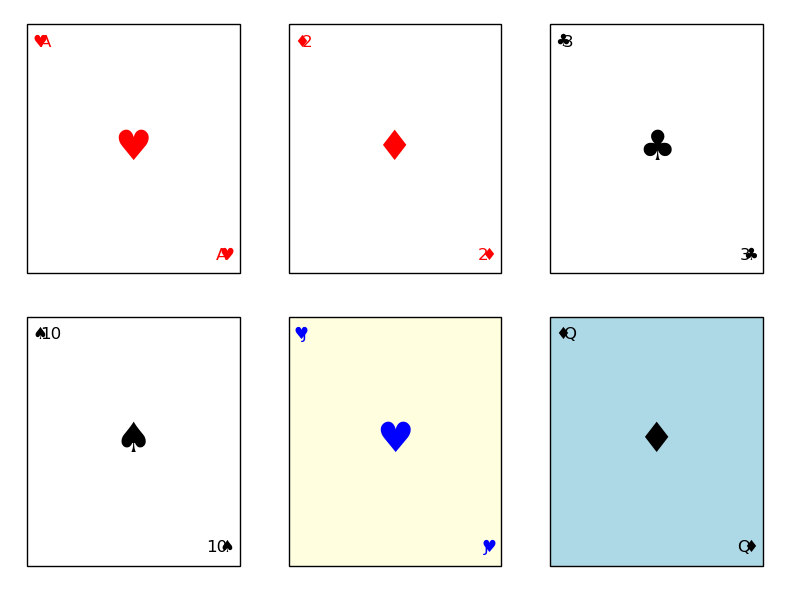

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.text as mpl_text
import numpy as np
import matplotlib.font_manager

def draw_playing_card(suit="Hearts", value="A", face_color="white", text_color="black", ax=None):
    """
    Draws a standard playing card with a specified suit, value, and colors.

    Args:
        suit (str, optional): The suit of the card. Defaults to "Hearts".
        value (str, optional): The value of the card. Defaults to "A".
        face_color (str, optional): The background color of the card. Defaults to "white".
        text_color (str, optional): The color of the text and suit symbols. Defaults to "black".
        ax (matplotlib.axes.Axes, optional): The axes object to draw on. If None, a new figure and axes are created.

    Returns:
        matplotlib.axes.Axes: The axes object on which the card is drawn.
    """
    matplotlib.font_manager.FontProperties
    font_props = matplotlib.font_manager.FontProperties(family=['Arial', 'sans-serif'])
    # Create a figure and axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(2.5, 3.5))  # Adjust size for card aspect ratio
    else:
        fig = ax.figure

    # Card dimensions
    card_width = 2.5
    card_height = 3.5
    corner_radius = 0.15

    # Create the rounded rectangle for the card
    # card_rect = patches.RoundRectangle((0, 0), card_width, card_height, corner_radius,
    card_rect = patches.Rectangle((0, 0), card_width, card_height,
                                     facecolor=face_color, edgecolor='black', linewidth=1)
    ax.add_patch(card_rect)

    # Set the limits of the axes to the card dimensions
    ax.set_xlim(-0.2, card_width + 0.2)  # Add some padding
    ax.set_ylim(-0.2, card_height + 0.2)
    ax.axis('off')  # Turn off the axes for a cleaner look

    # --- Helper functions for drawing suits and text ---

    def get_suit_symbol(suit):
        """
        Returns the appropriate symbol for a given suit.

        Args:
            suit (str): The suit of the card.

        Returns:
            str: The symbol for the suit.
        """
        suit_symbols = {
            "Hearts": "♥",
            "Diamonds": "♦",
            "Clubs": "♣",
            "Spades": "♠"
        }
        return suit_symbols.get(suit, "?")  # Default to "?" if suit is invalid

    def draw_text(text, x, y, size, color, ha='center', va='center', ax=ax):
        """
        Draws text on the card.

        Args:
            text (str): The text to draw.
            x (float): The x-coordinate of the text.
            y (float): The y-coordinate of the text.
            size (int): The size of the text.
            color (str): The color of the text.
            ha (str, optional): The horizontal alignment of the text. Defaults to 'center'.
            va (str, optional): The vertical alignment of the text. Defaults to 'center'.
            ax (matplotlib.axes.Axes, optional): The axes object to draw on. Defaults to the
                   ax object of the main function.
        """
        text_obj = mpl_text.Text(x, y, text, fontsize=size, color=color,
                                ha=ha, va=va, fontfamily='Sans-Serif') # Use a standard font
        ax.add_artist(text_obj)
        return text_obj # Return the text object in case further manipulation is needed

    def draw_suit(suit, x, y, size, color, ax=ax):
        """
        Draws a suit symbol on the card.

        Args:
            suit (str): The suit to draw.
            x (float): The x-coordinate of the suit symbol.
            y (float): The y-coordinate of the suit symbol.
            size (int): The size of the suit symbol.
            color (str): The color of the suit symbol.
             ax (matplotlib.axes.Axes, optional): The axes object to draw on. Defaults to the
                   ax object of the main function.
        """
        suit_symbol = get_suit_symbol(suit)
        text_obj = mpl_text.Text(x, y, suit_symbol, fontsize=size, color=color,
                                ha='center', va='center', fontfamily='Sans-Serif')  # Use a standard font
        ax.add_artist(text_obj)
        return text_obj

    # --- Draw the value and suit in the top left and bottom right corners ---
    # Positions for value and suit
    top_left_x = 0.15
    top_left_y = card_height - 0.15
    bottom_right_x = card_width - 0.15
    bottom_right_y = 0.15
    
       
    # Draw value and suit
    draw_text(value, top_left_x, top_left_y, 12, text_color, ha='left', va='top')
    draw_suit(suit, top_left_x, top_left_y - 0.1, 12, text_color)  # Adjust y for better positioning
    draw_text(value, bottom_right_x, bottom_right_y, 12, text_color, ha='right', va='bottom')
    draw_suit(suit, bottom_right_x, bottom_right_y + 0.1, 12, text_color) # Adjust y for better positioning

    # --- Draw the suit in the center of the card ---
    center_x = card_width / 2
    center_y = card_height / 2
    draw_suit(suit, center_x, center_y, 30, text_color)

    return ax

if __name__ == '__main__':
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(2, 3, figsize=(8, 6))  # Adjust figure size as needed

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Define some card parameters
    suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
    values = ["A", "2", "3", "10", "J", "Q", "K"]
    colors = ["red", "black"]

    # Draw a variety of cards
    draw_playing_card(suit=suits[0], value=values[0], face_color="white", text_color="red", ax=axes[0])
    draw_playing_card(suit=suits[1], value=values[1], face_color="white", text_color="red", ax=axes[1])
    draw_playing_card(suit=suits[2], value=values[2], face_color="white", text_color="black", ax=axes[2])
    draw_playing_card(suit=suits[3], value=values[3], face_color="white", text_color="black", ax=axes[3])
    draw_playing_card(suit=suits[0], value=values[4], face_color="lightyellow", text_color="blue", ax=axes[4]) #example with different color
    draw_playing_card(suit=suits[1], value=values[5], face_color="lightblue", text_color="black", ax=axes[5])

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()
